<a href="https://colab.research.google.com/github/Aishwarya55621/Spotify_dataset_data_visualization_Aishwarya/blob/main/Blockseblock_DataVisualizationTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/SpotifyFeatures.csv")

In [4]:
sns.set_theme(style="whitegrid")

In [5]:
print(df.head())

   genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

DATA VISUALIZATION

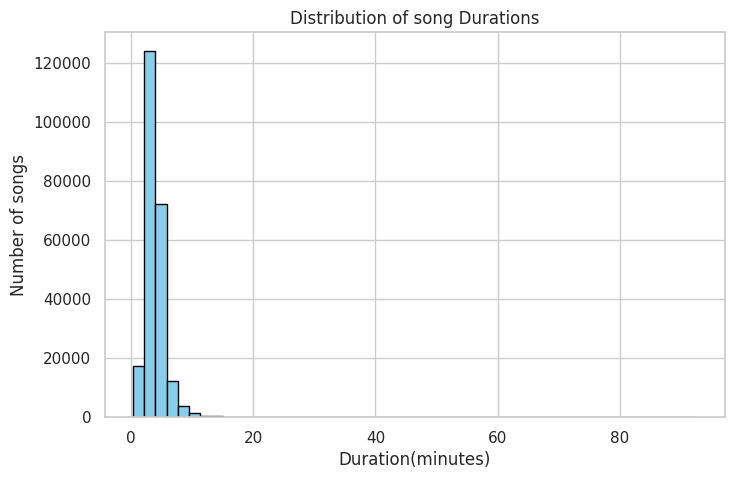

In [7]:
plt.figure(figsize=(8,5))
plt.hist(df['duration_ms']/60000, bins=50, color="skyblue", edgecolor="black")
plt.xlabel("Duration(minutes)")
plt.ylabel("Number of songs")
plt.title("Distribution of song Durations")
plt.show()

2. Bar chart of top 10 artists by number of tracks

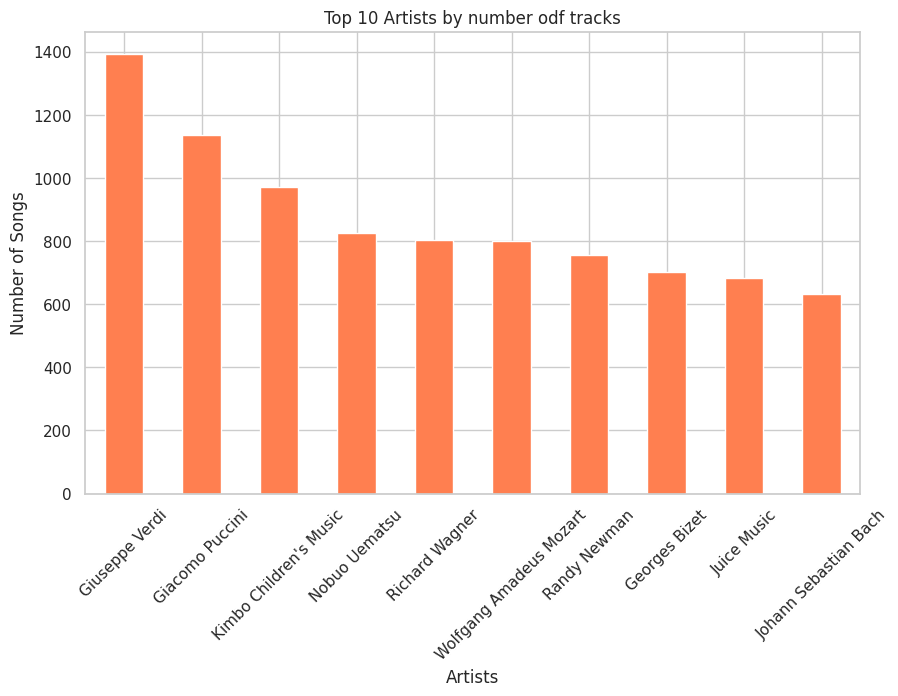

In [8]:
top_artists=df['artist_name'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_artists.plot(kind="bar" , color="coral")
plt.title("Top 10 Artists by number odf tracks")
plt.xlabel("Artists")
plt.ylabel("Number of Songs")
plt.xticks(rotation=45)
plt.show()

3.Line plot: Average Loudness over years

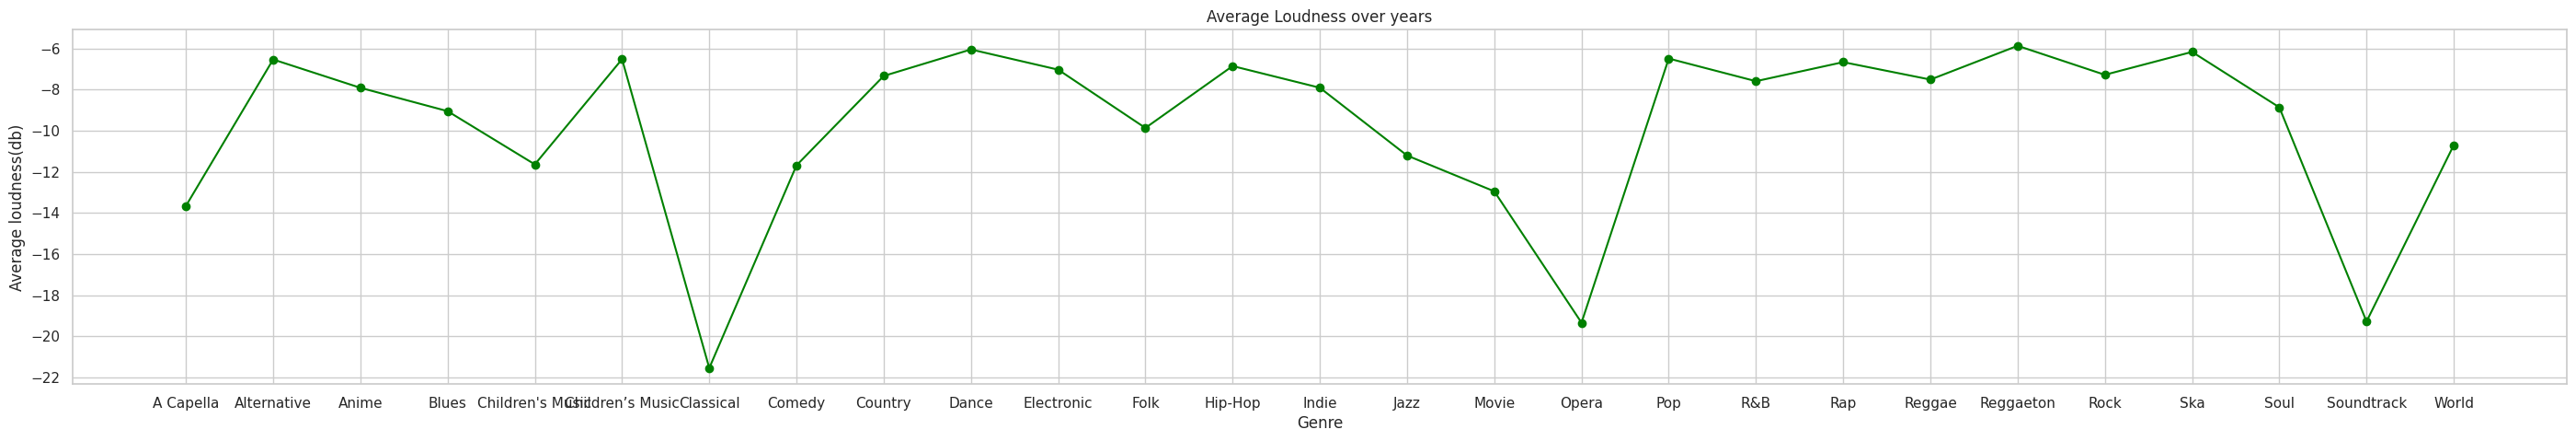

In [22]:
avg_loudness=df.groupby("genre")["loudness"].mean()
plt.figure(figsize=(35,5))
plt.plot(avg_loudness.index, avg_loudness.values, marker="o", color="green")
plt.title("Average Loudness over years")
plt.xlabel("Genre")
plt.ylabel("Average loudness(db)")
plt.show()

Pie chart: to depict the Genre distribution

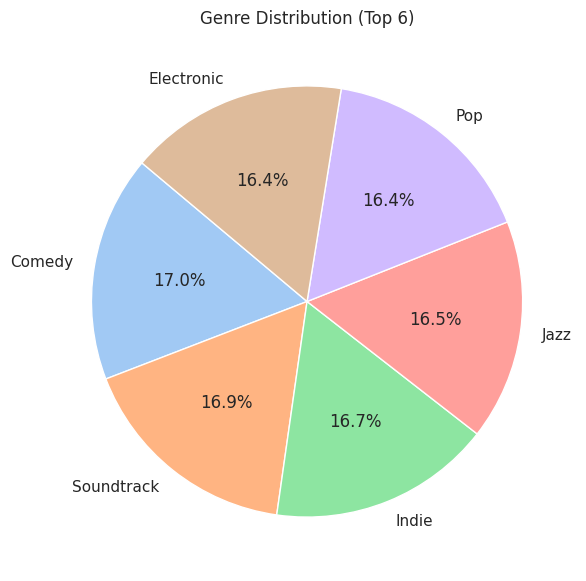

In [10]:
genre_counts=df['genre'].value_counts().head(6)
plt.figure(figsize=(7,7))
plt.pie(genre_counts.values, labels=genre_counts.index,autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Genre Distribution (Top 6)")
plt.show()

5. Scatter plot: Energy vs Danceability


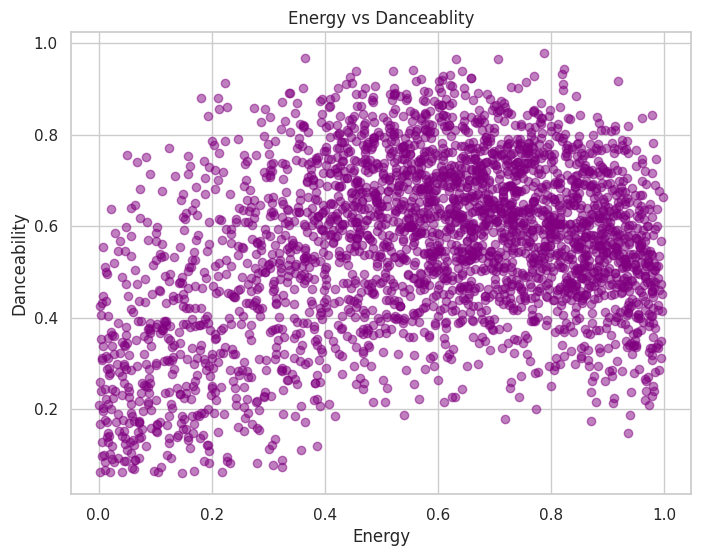

In [11]:
sample_df=df.sample(3000, random_state=42)
plt.figure(figsize=(8,6))
plt.scatter(sample_df['energy'],sample_df['danceability'], alpha=0.5, color="purple")
plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.title("Energy vs Danceablity")
plt.show()

6. Horizontal bar: Average tempo by genre (top 10)

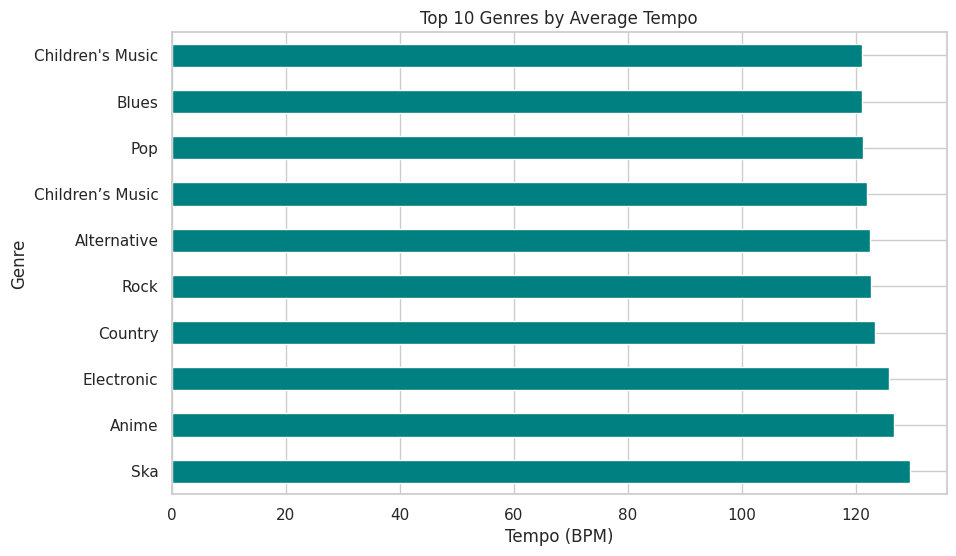

In [12]:
tempo_genre = df.groupby("genre")["tempo"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
tempo_genre.plot(kind="barh", color="teal")
plt.title("Top 10 Genres by Average Tempo")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Genre")
plt.show()

Seaborn Charts



/tmp/ipython-input-2867872226.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="genre", y="popularity", data=df, palette="Set2")


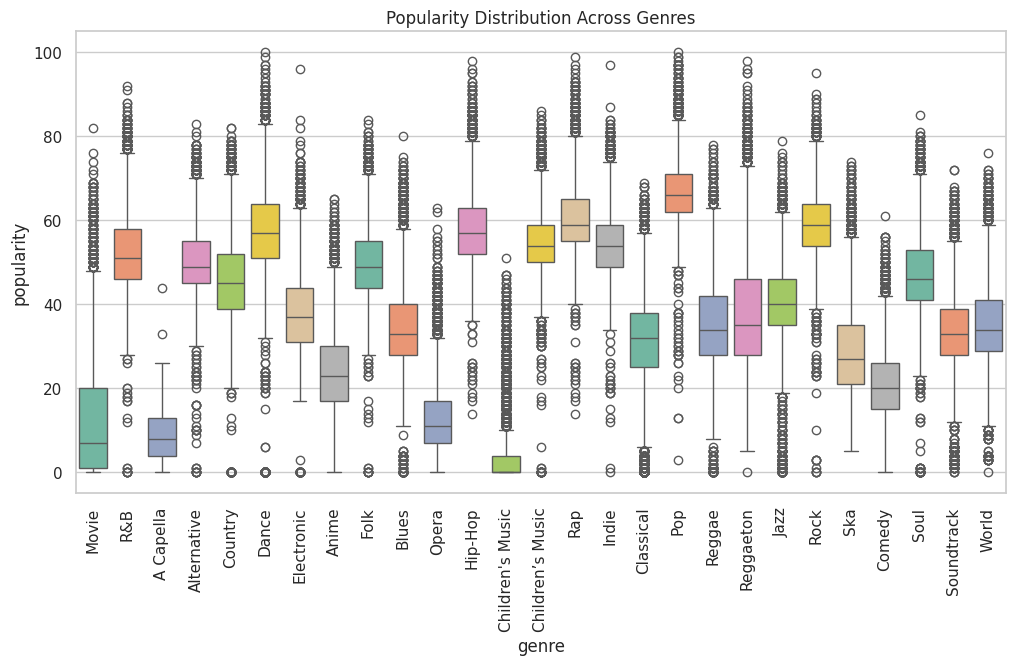

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x="genre", y="popularity", data=df, palette="Set2")
plt.title("Popularity Distribution Across Genres")
plt.xticks(rotation=90)
plt.show()

8. Violin plot: Danceability across genres

/tmp/ipython-input-220132612.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="genre", y="danceability", data=df, palette="muted", inner="quartile")


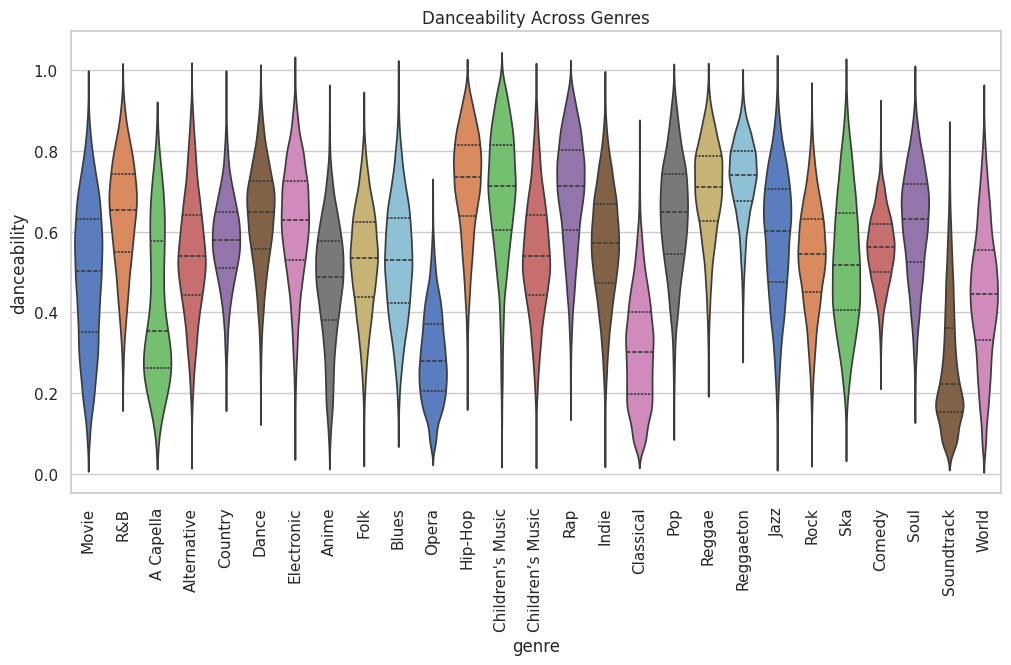

In [15]:
plt.figure(figsize=(12,6))
sns.violinplot(x="genre", y="danceability", data=df, palette="muted", inner="quartile")
plt.title("Danceability Across Genres")
plt.xticks(rotation=90)
plt.show()


9. Heatmap: Correlation between audio features

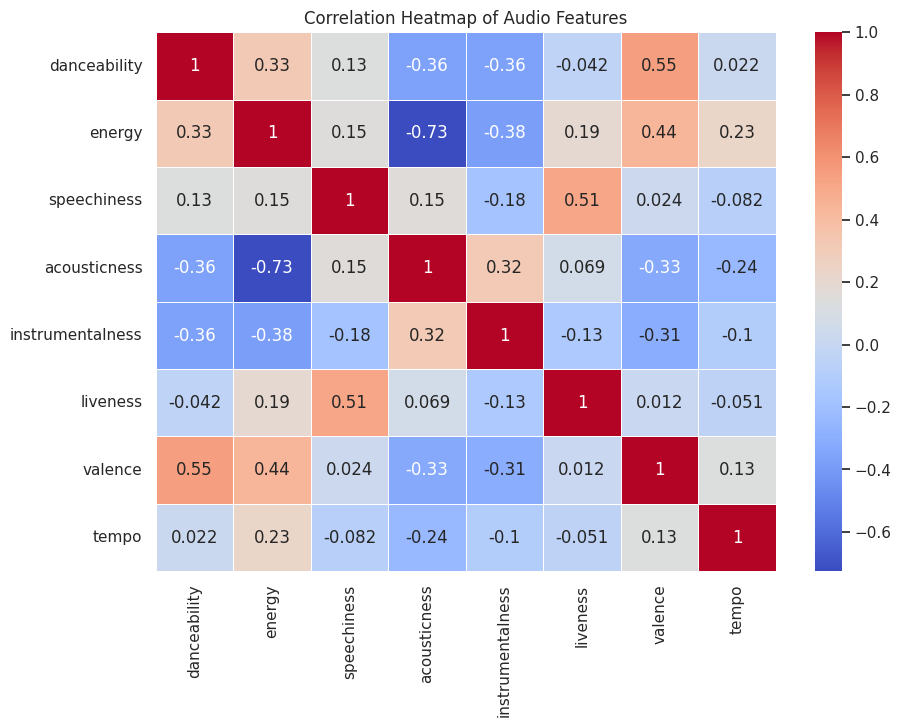

In [16]:
features = ['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence','tempo']
plt.figure(figsize=(10,7))
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Audio Features")
plt.show()

10. KDE Plot: Distribution of song loudness

/tmp/ipython-input-602470413.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['loudness'], shade=True, color="red")


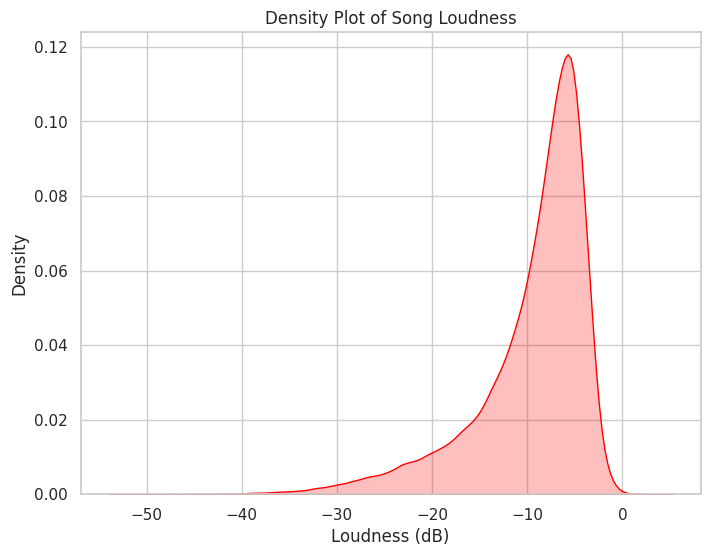

In [17]:
plt.figure(figsize=(8,6))
sns.kdeplot(df['loudness'], shade=True, color="red")
plt.title("Density Plot of Song Loudness")
plt.xlabel("Loudness (dB)")
plt.show()

Pairplot: Relationships between selected features

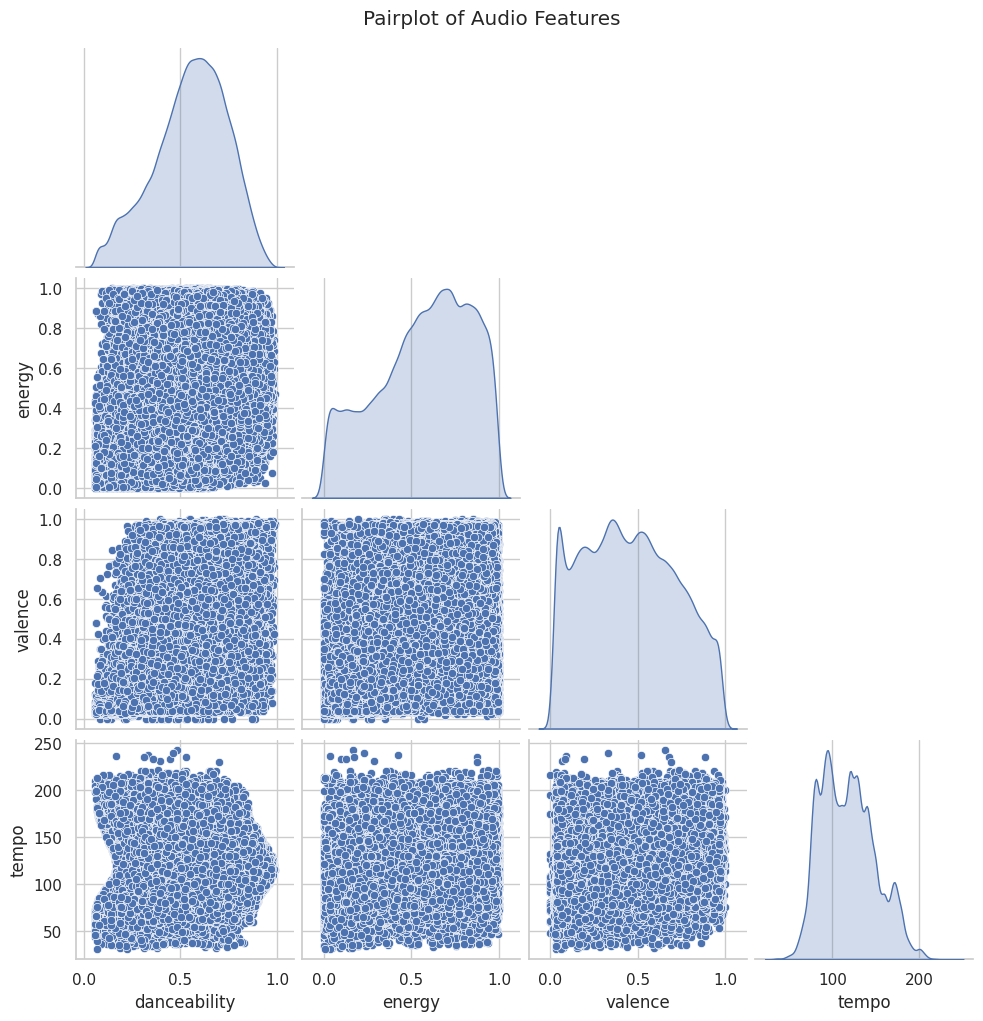

In [18]:
sns.pairplot(df[['danceability','energy','valence','tempo']], diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Audio Features", y=1.02)
plt.show()

12. Countplot: Distribution of popularity scores

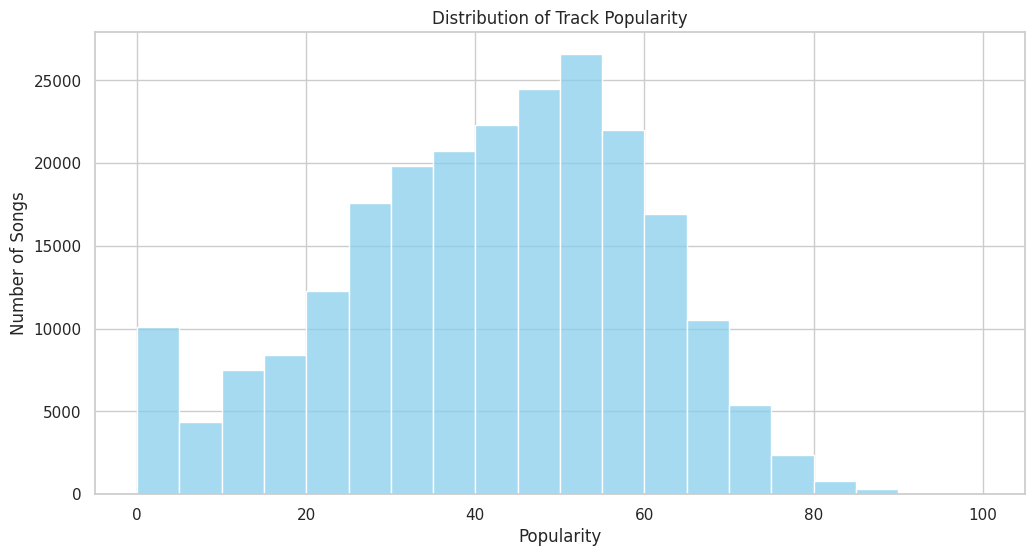

In [23]:

plt.figure(figsize=(12,6))
sns.histplot(df['popularity'], bins=20, kde=False, color="skyblue")
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Number of Songs")
plt.show()
